In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
# Load the dataset
df = pd.read_csv('/content/Churn_Modelling.csv')

In [25]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
# Drop unnecessary columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=columns_to_drop, inplace=True)

In [29]:
# Check for missing values
missing_values = df.isnull().sum()

In [30]:
# Basic stats
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

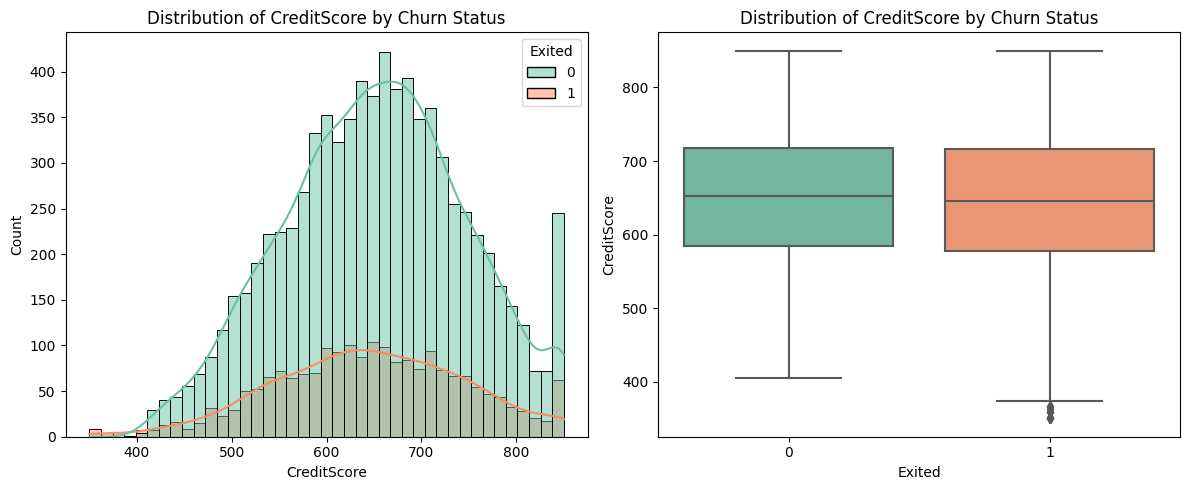

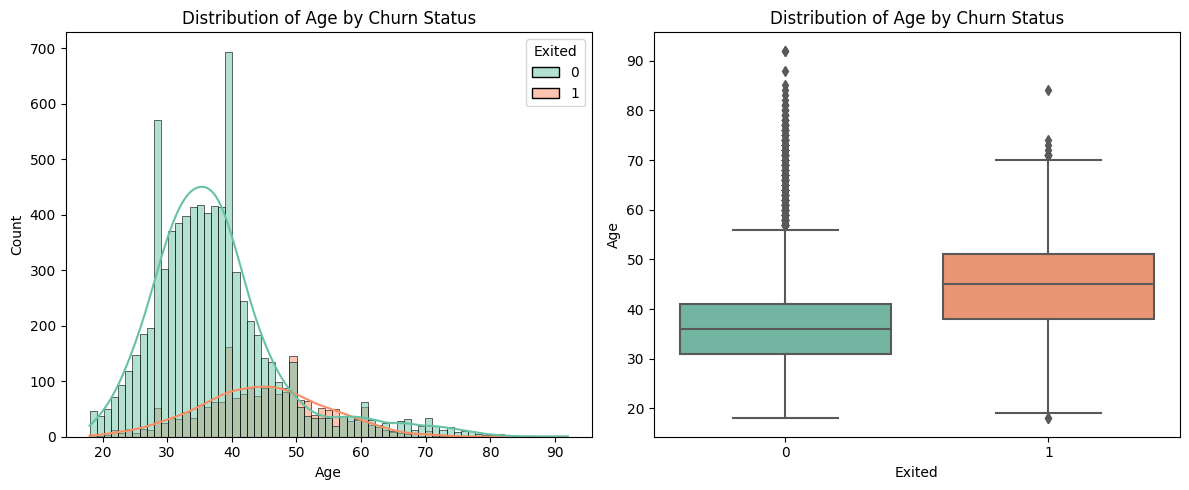

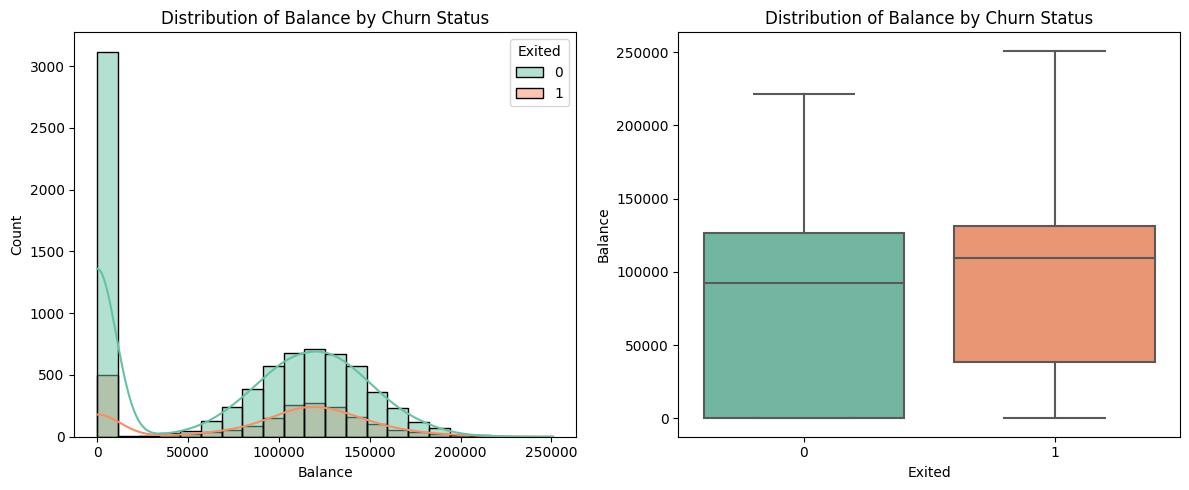

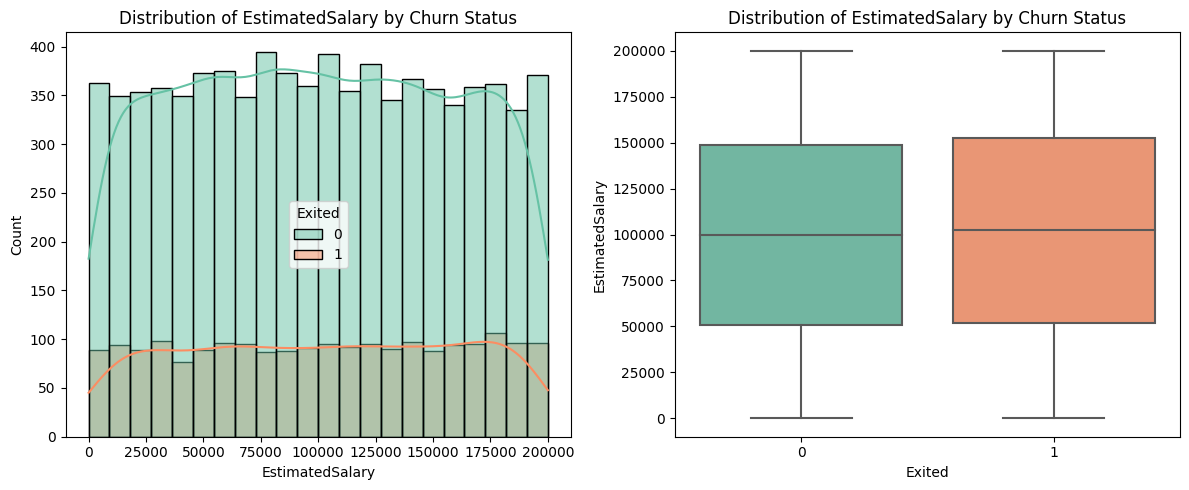

In [32]:
# Plot distributions and box plots for continuous variables
continuous_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for col in continuous_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue="Exited", data=df, kde=True, palette="Set2")
    plt.title(f"Distribution of {col} by Churn Status")

    plt.subplot(1, 2, 2)
    sns.boxplot(x="Exited", y=col, data=df, palette="Set2")
    plt.title(f"Distribution of {col} by Churn Status")
    plt.tight_layout()
    plt.show()

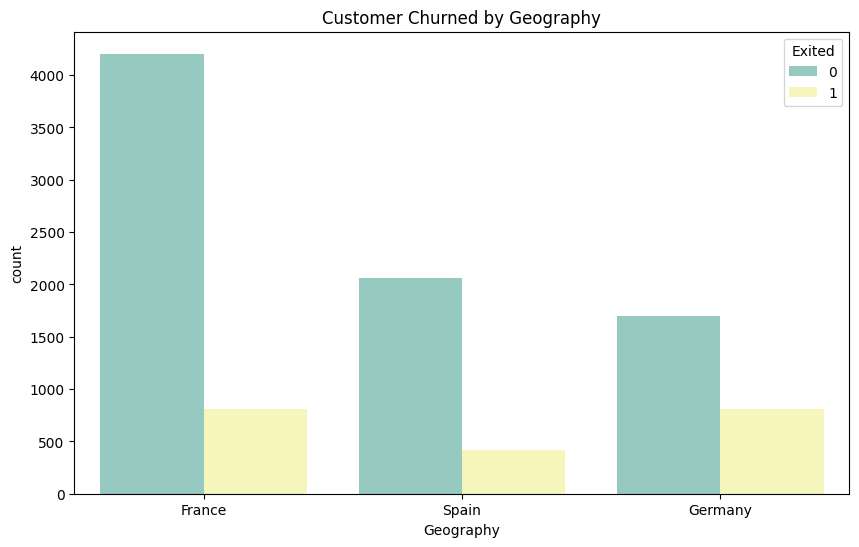

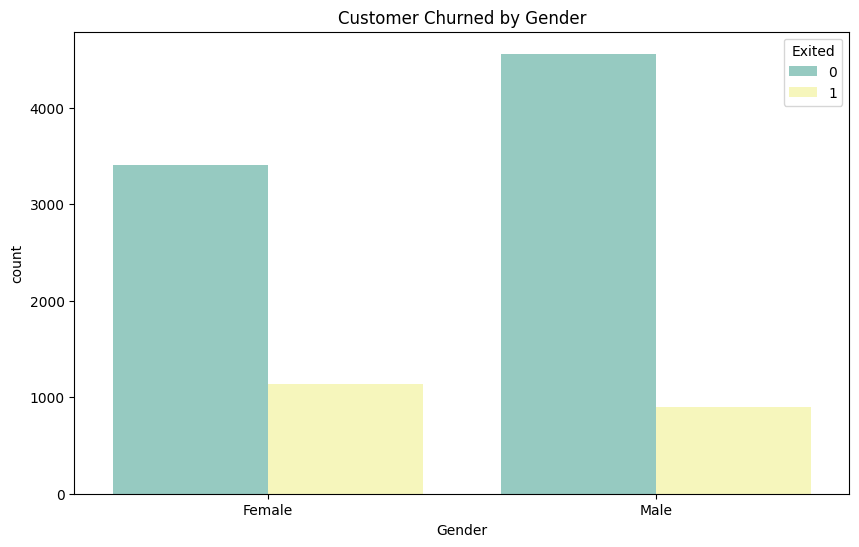

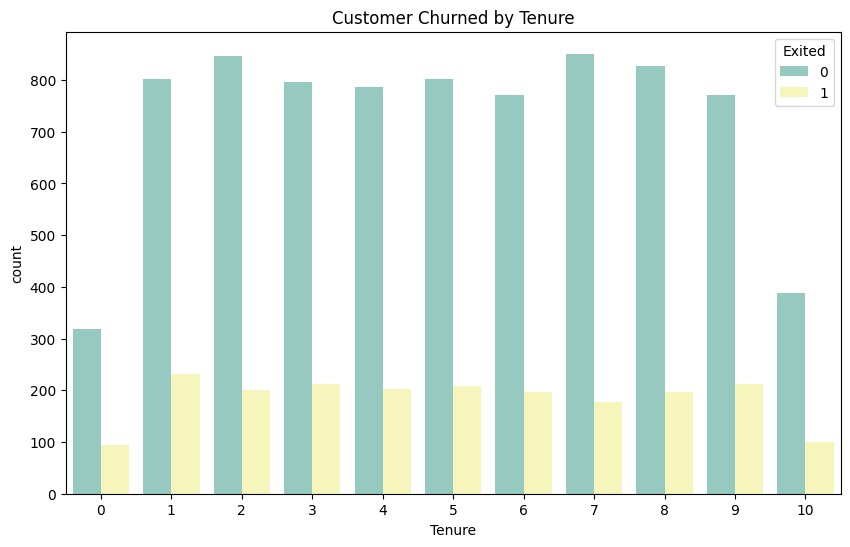

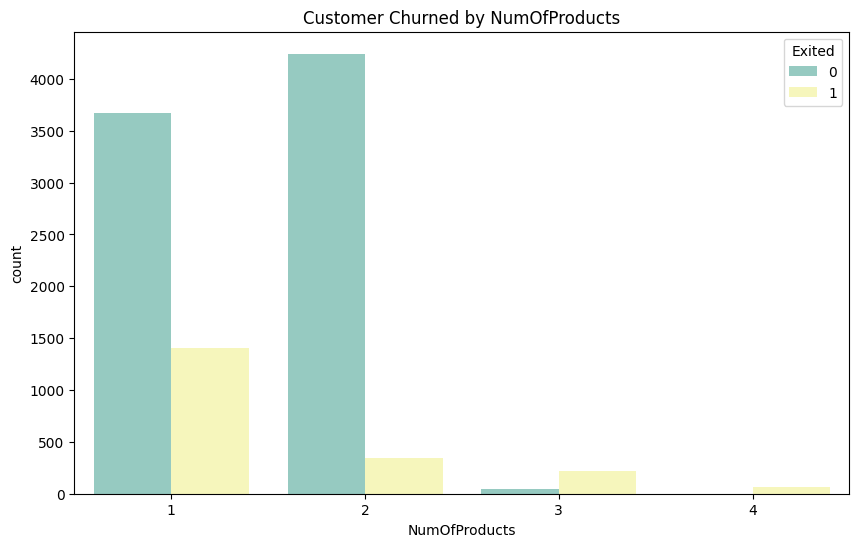

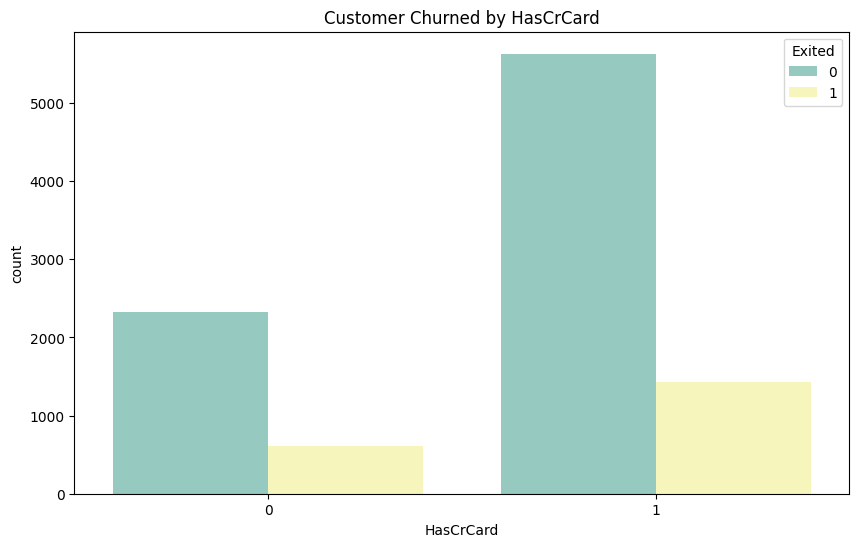

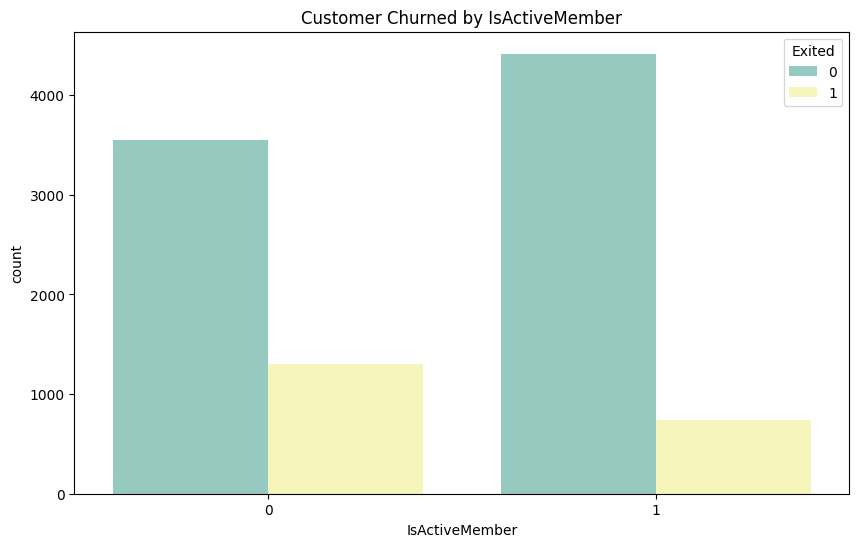

In [33]:
# Count plots for categorical variables
categorical_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, hue="Exited", palette="Set3")
    plt.title(f"Customer Churned by {col}")
    plt.show()

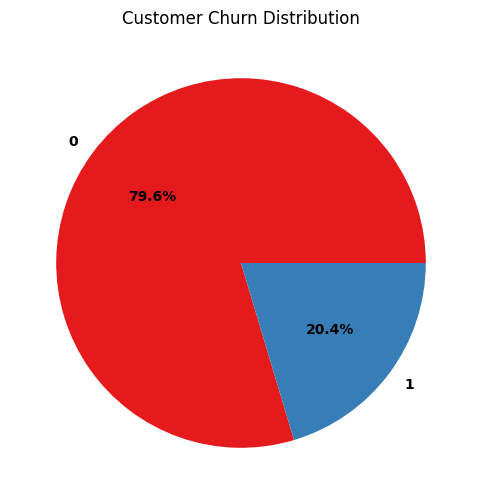

In [34]:
# Pie chart for target variable distribution
plt.figure(figsize=(6, 6))
count = df["Exited"].value_counts()
plt.pie(count, labels=count.index, autopct="%1.1f%%", colors=sns.color_palette("Set1"), textprops={"fontweight": "bold"})
plt.title("Customer Churn Distribution")
plt.show()

In [35]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [36]:
# Performing Principal Component Analysis to infer the best features for the model

# Extracting features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Data Scaling: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Dimensionality Reduction: PCA
pca = PCA(n_components=2)  # You can choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Feature Selection: Chi-Square
best_features = SelectKBest(score_func=chi2, k=10)  # Choose appropriate number of features
selected_features = best_features.fit(X, y)
X_selected = selected_features.transform(X)


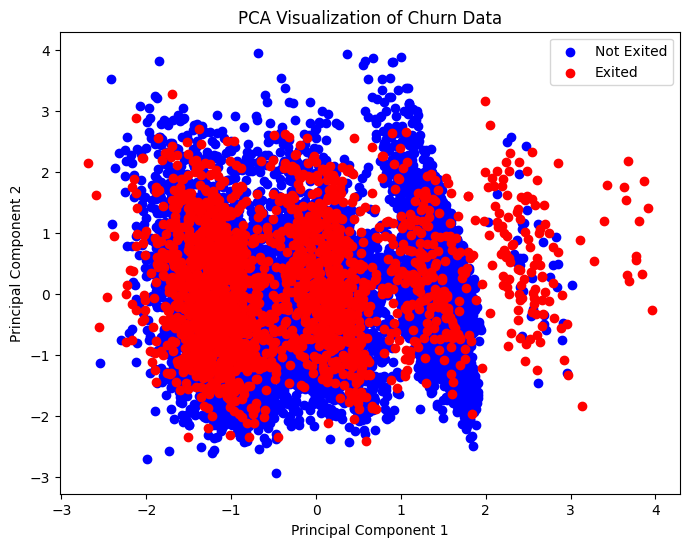

In [37]:
# Creating a scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='blue', label='Not Exited')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='red', label='Exited')
plt.title('PCA Visualization of Churn Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [38]:
# Binning 'Age' variable
age_bins = [0, 30, 40, 50, 60, 70, np.inf]
age_labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Cross tabulation of AgeGroup and Exited
cross_table01 = pd.crosstab(df['AgeGroup'], df['Exited'])
print(cross_table01)

Exited       0    1
AgeGroup           
<30       1820  148
30-40     3913  538
40-50     1532  788
50-60      349  448
60-70      227  104
70+        122   11


<Figure size 1000x600 with 0 Axes>

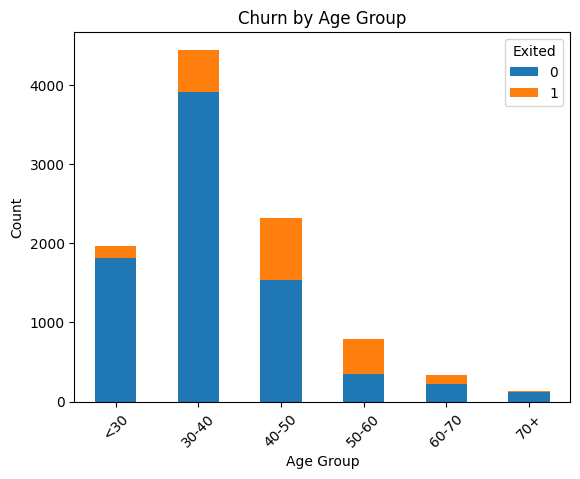

In [39]:
# Bar plot for cross tabulation
plt.figure(figsize=(10, 6))
cross_table01.plot(kind="bar", stacked=True)
plt.title('Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Exited')
plt.show()

<ipython-input-40-44358a707b0e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


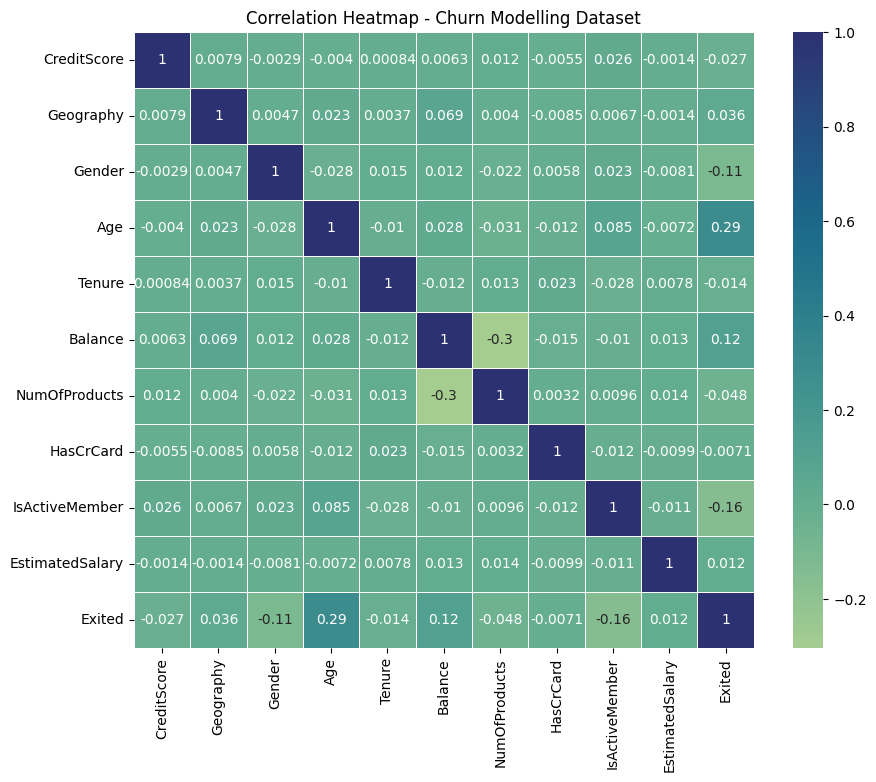

In [40]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Heatmap - Churn Modelling Dataset')
plt.show()

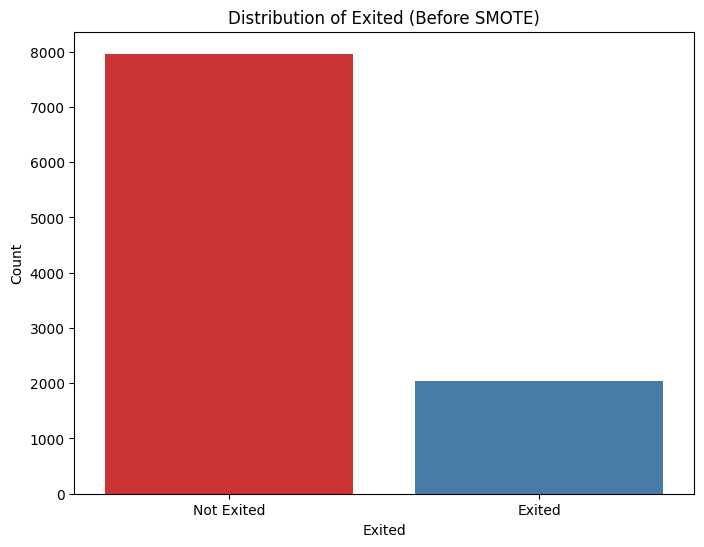

In [41]:
# Handling Imbalanced Data: SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df, palette='Set1')
plt.title('Distribution of Exited (Before SMOTE)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()

In [42]:
# SMOTE oversampling with suitable parameters
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)



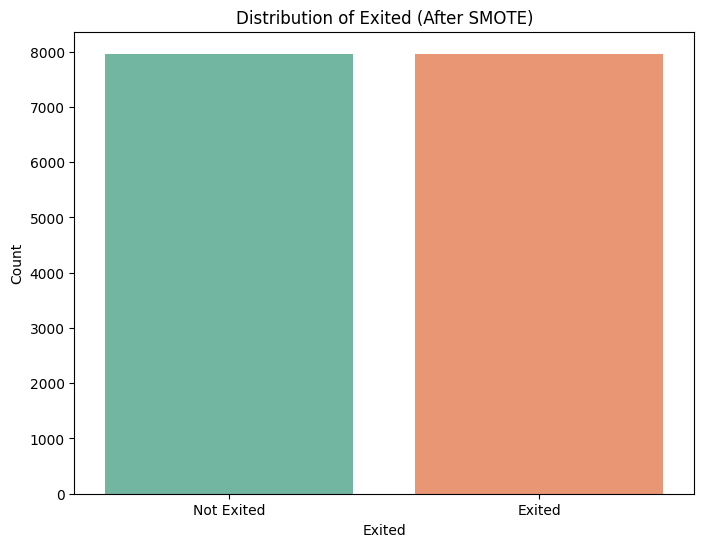

In [43]:
# Visualize the distribution of 'Exited' after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Distribution of Exited (After SMOTE)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()